<a href="https://colab.research.google.com/github/junsookim1/Everday_Practice/blob/master/koyang_data(19~28)_%EC%A7%84%ED%96%89%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## 19.전철역 공간정보(버스 노선이랑 합쳐서 표현해도 괜춘할듯)or(비슷한 정류장 끼리 묶어서)

In [ ]:
df_station=pd.read_csv('19.전철역_공간정보.csv')

In [ ]:
df_station
# raim_nm - 지하철 노선 넘버
# station_nm - 지하철 역이름
# lot_num_addr - 옛날 주소 이름
# road_nm_addr - 바뀐 주소 이름

,rail_nm,station_nm,lot_num_addr,road_nm_addr,X,Y
0,3호선,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,126.809614,37.632306
1,3호선,대화,경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,126.747206,37.675846
2,경의중앙,일산,경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,126.770067,37.682007
3,3호선,백석,경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,126.788148,37.642953
4,경의중앙,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,126.811047,37.631615
5,경의중앙,강매,경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,126.844436,37.612290
6,경의중앙,백마,경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,126.794067,37.658431
7,경의중앙,능곡,경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,126.820838,37.618765
8,경의중앙,풍산,경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,126.786528,37.671815
9,경의중앙,행신,경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,126.834117,37.612170


In [ ]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rail_nm       21 non-null     object 
 1   station_nm    21 non-null     object 
 2   lot_num_addr  20 non-null     object 
 3   road_nm_addr  21 non-null     object 
 4   X             21 non-null     float64
 5   Y             21 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [ ]:
df_station.describe()

,X,Y
count,21.000000,21.000000
mean,126.814598,37.647770
std,0.046072,0.024028
min,126.747206,37.603298
25%,126.777650,37.632306
50%,126.809614,37.650746
75%,126.843030,37.659493
max,126.913728,37.693857


In [ ]:
df_station['station_nm'].unique()

array(['대곡', '대화', '일산', '백석', '강매', '백마', '능곡', '풍산', '행신', '화전(한국항공대)',
       '탄현', '주엽', '정발산', '마두', '화정', '곡산', '원흥', '원당', '삼송', '지축역'],
      dtype=object)

In [ ]:
del df_station['lot_num_addr'] # 지번 주소 삭제

In [ ]:
df_station.isnull().sum() # 결측치 확인


rail_nm         0
station_nm      0
road_nm_addr    0
X               0
Y               0
dtype: int64

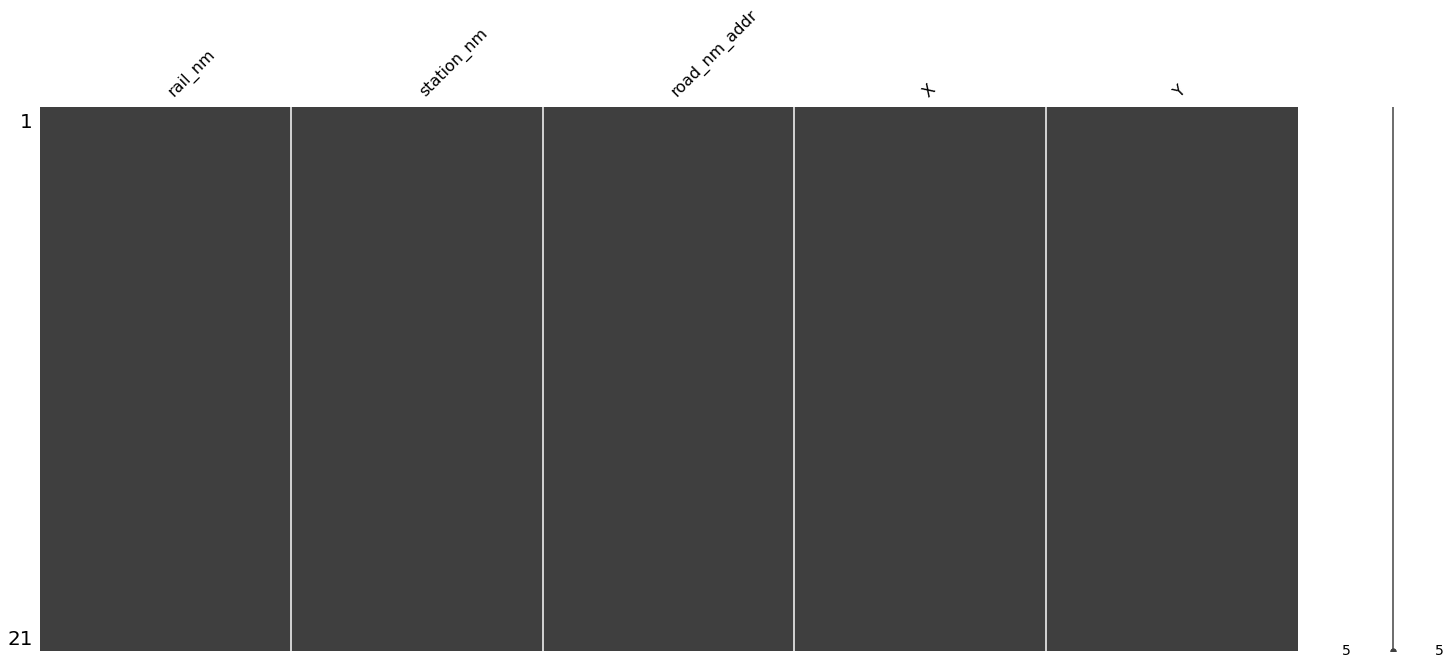

In [ ]:
import missingno as msno
msno.matrix(df_station) # 결측지 시각화 자료


In [ ]:
df_station # 위도,경도가 있어서 주소가 필요할지는 한번 생각해 봐야 할듯함요~

,rail_nm,station_nm,road_nm_addr,X,Y
0,3호선,대곡,경기도 고양시 덕양구 대주로107번길 71-81,126.809614,37.632306
1,3호선,대화,경기도 고양시 일산서구 중앙로 지하 1569,126.747206,37.675846
2,경의중앙,일산,경기도 고양시 일산서구 경의로 672,126.770067,37.682007
3,3호선,백석,경기도 고양시 일산동구 중앙로 지하 1042,126.788148,37.642953
4,경의중앙,대곡,경기도 고양시 덕양구 대주로 107번길 71-81,126.811047,37.631615
5,경의중앙,강매,경기도 고양시 덕양구 소원로 202,126.844436,37.612290
6,경의중앙,백마,경기도 고양시 일산동구 경의로 318,126.794067,37.658431
7,경의중앙,능곡,경기도 고양시 덕양구 토당로 35,126.820838,37.618765
8,경의중앙,풍산,경기도 고양시 일산동구 경의로 486,126.786528,37.671815
9,경의중앙,행신,경기도 고양시 덕양구 소원로 114,126.834117,37.612170


In [ ]:
# 역 정보 위치 확인 (3호선 원흥역)
center = (37.650746, 126.872600); zoom = 17
Wonheung_station = folium.Map(location=center, zoom_start=zoom)
Wonheung_station

In [ ]:
Wonheung_station_Toner = folium.Map(location=[37.650746, 126.872600], tiles='Stamen Toner', zoom_start=15)
Wonheung_station_Toner

In [ ]:
## 지도 중심 먼저 구해주기
lat = df_station['Y'].mean()
long = df_station['X'].mean()
lat, long

(37.64777025190476, 126.81459757)

In [ ]:
m = folium.Map([lat,long], zoom_start = 12, tiles = 'Stamen Toner') #tiles - 색상변경

for i in df_station.index:
    sub_lat = df_station.loc[i, 'Y']
    sub_long = df_station.loc[i, 'X']
    
#     sub_sta = df_station.loc[i, 'station_nm'] + ' - ' + df_station.loc[i, 'road_nm_addr'] # 문자열을 더해주는 방법1
    sub_sta = f"{df_station.loc[i, 'station_nm']} - {df_station.loc[i, 'road_nm_addr']}" # 문자열을 더해주는 방법2 (f_formatting)
    
#     #     print(sub_lat,sub_long, sub_sta)
    folium.Marker([sub_lat, sub_long],
                 tooltip = sub_sta).add_to(m)
    
#     color = 'green'
#     if df_station.loc[i, 'rail_nm']  == "3호선":
#         color = 'yellow'
#     folium.CircleMarker([sub_lat, sub_long],
#                          radius = 3, color=color,
#                  tooltip = sub_sta).add_to(m)   # 서클 표현 및 색 변환

m

In [ ]:
m.save('index.html')

In [ ]:
# 각 호선별로 나타내기
m_cir = folium.Map([lat,long], zoom_start = 12) #tiles - 색상변경

for i in df_station.index:
    sub_lat = df_station.loc[i, 'Y']
    sub_long = df_station.loc[i, 'X']
    
#     sub_sta = df_station.loc[i, 'station_nm'] + ' - ' + df_station.loc[i, 'road_nm_addr'] # 문자열을 더해주는 방법1
    sub_sta = f"{df_station.loc[i, 'station_nm']} - {df_station.loc[i, 'road_nm_addr']}" # 문자열을 더해주는 방법2 (f_formatting)
    

    
    color = 'green' # 경인중앙
    if df_station.loc[i, 'rail_nm']  == "3호선":
        color = 'red' # 3호선
    folium.CircleMarker([sub_lat, sub_long],
                         radius = 3, color=color,
                 tooltip = sub_sta).add_to(m_cir)   # 서클 표현 및 색 변환

m_cir

## 20.고양시_버스정류소(하루 이용인구나 시간 같이)

In [ ]:
df_bus_sta = pd.read_csv('20.고양시_버스정류소.csv')

In [ ]:
df_bus_sta.tail()
# STATION_NM - 버스역 이름
# STATION_ID - 버스역 ID

,STATION_NM,STATION_ID,X,Y
2227,고양시청후문,218000940,126.832676,37.659090
2228,사리현동문아파트,219000927,126.845347,37.699382
2229,서울시립고양병원입구,218000530,126.852005,37.712236
2230,옥빛마을14.15단지,218001000,126.833325,37.628699
2231,토당육교교차로,218000353,126.822097,37.628753


In [ ]:
df_bus_sta.shape

(2232, 4)

In [ ]:
df_bus_sta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATION_NM  2232 non-null   object 
 1   STATION_ID  2232 non-null   int64  
 2   X           2232 non-null   float64
 3   Y           2232 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 69.9+ KB


In [ ]:
m_bus = folium.Map([df_bus_sta['Y'].mean(),df_bus_sta['X'].mean()], zoom_start = 12, tiles = 'Stamen Toner') #tiles - 색상변경

for i in df_bus_sta.index:
    sub_lat = df_bus_sta.loc[i, 'Y']
    sub_long = df_bus_sta.loc[i, 'X']
    
#     sub_sta = df_station.loc[i, 'station_nm'] + ' - ' + df_station.loc[i, 'road_nm_addr'] # 문자열을 더해주는 방법1
    sub_sta = df_bus_sta.loc[i, 'STATION_NM'] 
#     #     print(sub_lat,sub_long, sub_sta)
    folium.Marker([sub_lat, sub_long],
                 tooltip = sub_sta).add_to(m_bus)
    
#     color = 'green'
#     if df_station.loc[i, 'rail_nm']  == "3호선":
#         color = 'yellow'
#     folium.CircleMarker([sub_lat, sub_long],
#                          radius = 3, color=color,
#                  tooltip = sub_sta).add_to(m)   # 서클 표현 및 색 변환

m_bus

## 21.버스_정류장별_승하차_정보

In [ ]:
df_bus_sta_info = pd.read_csv('21.버스_정류장별_승하차_정보.csv')

In [ ]:
df_bus_sta_info.head()
# GETON_CNT버스 정류장 승차 인원수 (인원수 의미 생각해보기) / 같은 STATION_NM이라도 STATION_ID가 다를 수 있다. 

,STATION_ID,STATION_NM,GETON_CNT
0,218001046,화정역3호선,229091
1,218001083,원당역,219186
2,218000974,화정역3호선,197084
3,219000193,대화역,191696
4,219000193,대화역,169990


In [ ]:
df_bus_sta_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATION_ID  2888 non-null   int64 
 1   STATION_NM  2888 non-null   object
 2   GETON_CNT   2888 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 67.8+ KB


In [ ]:
df_bus_sta_info['GETON_CNT'].unique()

array([229091, 219186, 197084, ...,      2,      1,      0])

In [ ]:
df_bus_sta_info['STATION_NM'].unique()[:30]

array(['화정역3호선', '원당역', '대화역', '마두역(중)', '일산동구청(중)', '삼송역8번출구',
       '백석동.요진와이시티(중)', '주엽역(중)', '삼송역5번출구', '백마역', '일산동부경찰서(중)',
       '화정역.롯데마트', '삼송역3번출구', '백석역.고양종합터미널', '삼송역4번출구', '삼송역6번출구',
       '행신초등학교(중)', '행신역', '원흥역3번출구', '중산마을10단지.동신아파트', '현대백화점', '중부대학교',
       '백석역(중)', '스타필드후문', '동국대병원정문', '고양경찰서(중)', '신원마을2단지후문', '강선마을(중)',
       '화정1동행정복지센터', '해태쇼핑.중산사거리'], dtype=object)

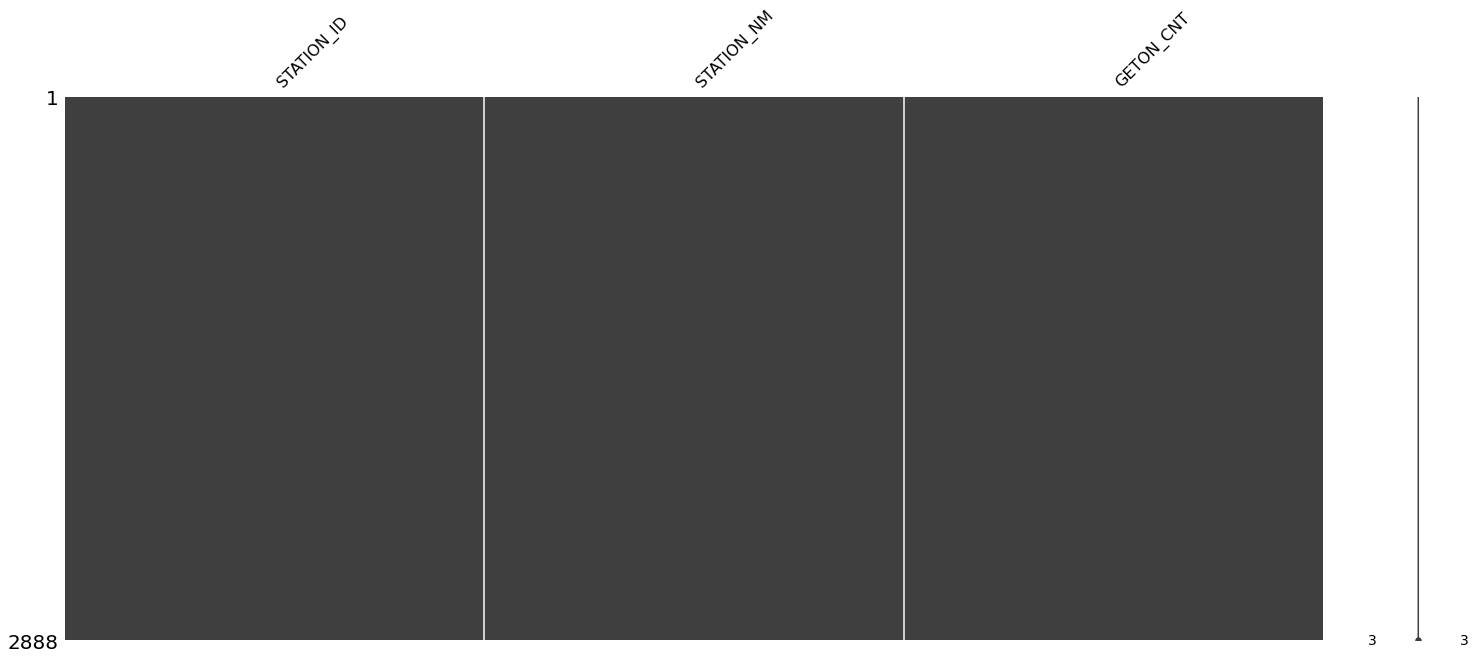

In [ ]:
import missingno as msno
msno.matrix(df_bus_sta_info) # 결측지 시각화 자료


In [ ]:
df_bus_sta_info.describe()

,space,X,Y
count,70.000000,70.000000,70.000000
mean,123.628571,126.801444,37.656970
std,113.553814,0.039982,0.026980
min,5.000000,126.742548,37.600179
25%,32.250000,126.769136,37.639865
50%,77.500000,126.789086,37.658648
75%,194.500000,126.832540,37.678804
max,512.000000,126.905347,37.710213


## 22.주차장 정보

In [ ]:
df_park = pd.read_csv('22.주차장정보.csv')

In [ ]:
df_park 
# parking_nm - 주차장 명
# space - 주차 가능한 자동차 대수
# 

,parking_nm,road_nm_addr,lot_num_addr,space,X,Y
0,고양시청 부설주차장,경기도 고양시 덕양구 고양시청로10,경기도 고양시 덕양구 주교동 600,140,126.832072,37.658042
1,고양제1,경기도 고양시 덕양구 벽제관로 8,경기도 고양시 덕양구 고양동 195-2,94,126.903861,37.703783
2,고양제2,경기도 고양시 덕양구 혜음로 103,경기도 고양시 덕양구 고양동 444-1,31,126.905347,37.710213
3,노상 1권역,경기도 고양시 덕양구 고양시청로 10,경기도 고양시 덕양구 주교동 600,97,126.831960,37.658414
4,노상 3권역,경기도 고양시 덕양구 은빛로 39,경기도 고양시 덕양구 화정동 909,123,126.832173,37.638096
...,...,...,...,...,...,...
65,호수공원 부설주차장 2,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,512,126.763193,37.661923
66,호수공원 부설주차장 3,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,54,126.769069,37.654901
67,호수공원 부설주차장 4,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,125,126.770942,37.651669
68,화정환승,경기도 고양시 덕양구 화정로 지하 63,경기도 고양시 덕양구 화정동 963,253,126.833046,37.634951


In [ ]:
del df_park['lot_num_addr'] # 주차장 지번 주소 삭제

In [ ]:
df_park['space']

0     140
1      94
2      31
3      97
4     123
     ... 
65    512
66     54
67    125
68    253
69     15
Name: space, Length: 70, dtype: int64

In [ ]:
df_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   parking_nm  70 non-null     object 
 1   space       70 non-null     int64  
 2   X           70 non-null     float64
 3   Y           70 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
df_park['space'].unique()

array([140,  94,  31,  97, 123,  11, 147, 214, 179,  25, 309, 274,  27,
       247, 166, 300, 132, 185,  30,  29,  22,  33, 294, 366,  20,   5,
        99, 193, 195, 215, 282, 336, 359,  60, 103,   9,  10,  32,  57,
        50,  39,  79,  47, 233,  76,  59, 111,  40,  44,  43,  49,  46,
        24,  48,  83, 165, 248, 512,  54, 125, 253,  15])

In [ ]:
df_park.describe()

,space,X,Y
count,70.000000,70.000000,70.000000
mean,123.628571,126.801444,37.656970
std,113.553814,0.039982,0.026980
min,5.000000,126.742548,37.600179
25%,32.250000,126.769136,37.639865
50%,77.500000,126.789086,37.658648
75%,194.500000,126.832540,37.678804
max,512.000000,126.905347,37.710213


In [ ]:
m_park = folium.Map([df_park['Y'].mean(),df_park['X'].mean()], zoom_start = 12, tiles = 'Stamen Toner') #tiles - 색상변경

for i in df_park.index:
    sub_lat = df_park.loc[i, 'Y']
    sub_long = df_park.loc[i, 'X']
    
    sub_sta = df_park.loc[i, 'parking_nm'] 
#     #     print(sub_lat,sub_long, sub_sta)
    folium.Marker([sub_lat, sub_long],
                 tooltip = sub_sta).add_to(m_park)
    
m_park

In [ ]:
# circle 타입과 space로 크기 조절하기 (다음에)

m_park = folium.Map([df_park['Y'].mean(),df_park['X'].mean()], zoom_start = 13, tiles = 'Stamen Toner') #tiles - 색상변경

for i in df_station.index:
    sub_lat = df_station.loc[i, 'Y']
    sub_long = df_station.loc[i, 'X']
    sub_sta = df_park.loc[i, 'parking_nm'] 
       
    color = 'green' # 경인중앙
    if df_station.loc[i, 'rail_nm']  == "3호선":
        color = 'red' # 3호선
    folium.CircleMarker([sub_lat, sub_long],
                         radius = 3, color=color,
                 tooltip = sub_sta).add_to(m_cir)   # 서클 표현 및 색 변환

m_cir